# Photometery of R Mon BAT data

Daniel Köhn

Schwentinental, 04.12.2021

**Import libraries**

In [100]:
import imageio
import numpy as np
from numba import jit # import JIT from Numba
from matplotlib import pyplot as plt
%matplotlib inline

**Import and plot image**

In [101]:
im = imageio.imread('images/2021-10-29_L_MrCrazyPhysicist_NGC2261_r.jpg')

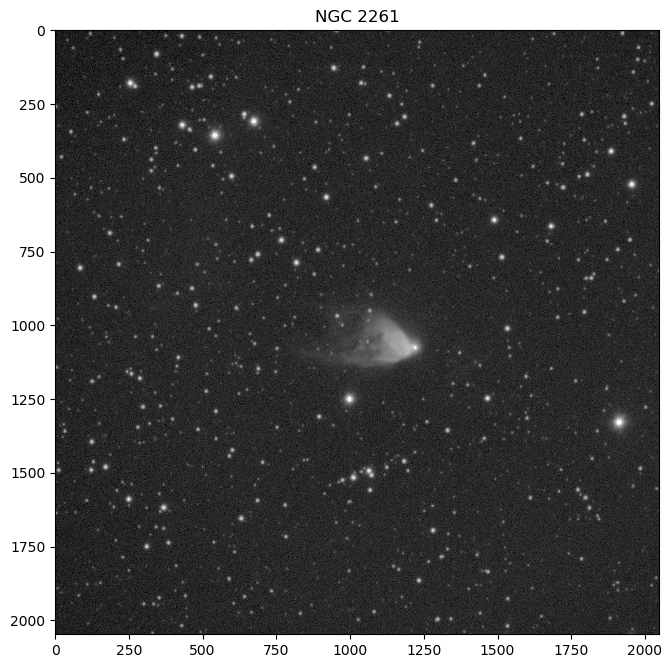

In [102]:
fig = plt.figure(figsize=(8,8), dpi=100)
cmap = 'gray'

plt.imshow(im, interpolation='none', cmap=cmap)
plt.title('NGC 2261')

plt.show()

**Define center and radius of R Mon and reference star mask**

In [103]:
# R Mon
radius_R = 8
cent_R = [1221,1077]

# reference star #1
radius_ref1 = radius_R
cent_ref1 = [818,788]
mag_ref1 = 12.8

# reference star #2
radius_ref2 = radius_R
cent_ref2 = [1515,769]
mag_ref2 = 13.5

# increase sky_mask radius wrt 
radius_sky = radius_R + 4

**Function for star mask creation**

In [104]:
@jit(nopython=True) # use Just-In-Time (JIT) Compilation
def create_star_mask(im, cent, radius):
    
    nx, ny = im.shape
    
    mask = np.zeros((ny, nx))
    
    # define star mask
    for j in range (0,ny):
        for i in range (0,nx):
            
            if(radius >= np.sqrt((j-cent[1])**2+(i-cent[0])**2)):               
               mask[j,i] = 1
    
    return mask

**Define star mask for R Mon & ref stars**

In [105]:
mask_R = create_star_mask(im,cent_R,radius_R)
mask_ref1 = create_star_mask(im,cent_ref1,radius_ref1)
mask_ref2 = create_star_mask(im,cent_ref2,radius_ref2)

**Create sky masks**

In [106]:
sky_R = create_star_mask(im,cent_R,radius_sky)
sky_ref1 = create_star_mask(im,cent_ref1,radius_sky)
sky_ref2 = create_star_mask(im,cent_ref2,radius_sky)

sky_R = sky_R - mask_R
sky_ref1 = sky_ref1 - mask_ref1
sky_ref2 = sky_ref2 - mask_ref2

**Check star masks**

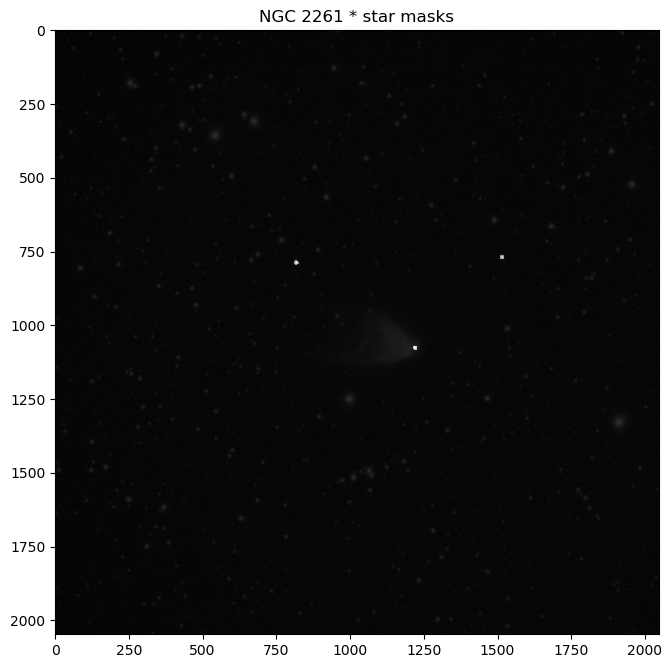

In [107]:
fig = plt.figure(figsize=(8,8), dpi=100)
cmap = 'gray'

plt.imshow(mask_R*im + mask_ref1*im + mask_ref2*im + .2*im, interpolation='none', cmap=cmap)
plt.title('NGC 2261 * star masks')

plt.show()

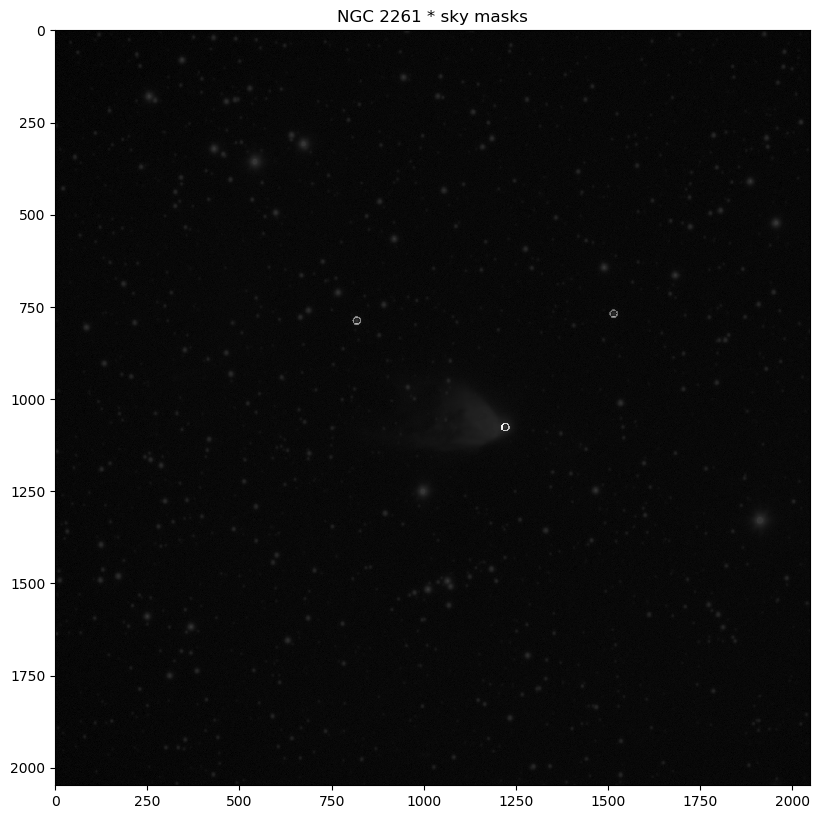

In [114]:
fig = plt.figure(figsize=(10,10), dpi=100)
cmap = 'gray'

plt.imshow(sky_R*im + sky_ref1*im + sky_ref2*im + .2*im, interpolation='none', cmap=cmap)
plt.title('NGC 2261 * sky masks')

plt.show()

**Compute mean brightness values within each star mask**

In [109]:
f_R = np.mean(mask_R*im)
f_ref1 = np.mean(mask_ref1*im)
f_ref2 = np.mean(mask_ref2*im)

**Compute sky brightness**

In [110]:
fs_R = np.mean(sky_R*im)
fs_ref1 = np.mean(sky_ref1*im)
fs_ref2 = np.mean(sky_ref2*im)

**Subtract sky**

In [111]:
f_R = f_R - fs_R
f_ref1 = f_ref1 - fs_ref1
f_ref2 = f_ref2 - fs_ref2

**Compute apparent magnitude of R Mon**

In [112]:
# compute apparent magnitude scale dmag from difference of reference stars
dmag = (mag_ref2 - mag_ref1) / (f_ref1 - f_ref2)

# compute difference between reference star and R Mon
dref = f_R - f_ref2

# compute apparent magnitude of R Mon
mag_R = mag_ref2 - dref * dmag

print('Apparent magnitude of R Mon:', mag_R, 'mag')

Apparent magnitude of R Mon: 5.333878504672905 mag
